#Name: Saran Adhikari
#University ID: 2329794
#Artifical Intelligence and Machine Learning
#Worksheet01

In [ ]:
# Necessary Imports
from google.colab import drive
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


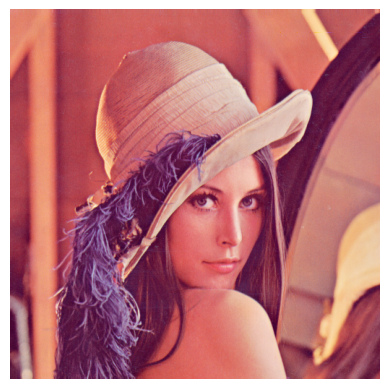

In [40]:
#Adding first image
imageOne = "/content/drive/MyDrive/AI&ML/WEEK1/Lenna_(test_image).png"

# Check if the file exists
if os.path.exists(imageOne):
    # Open and display the image
    image_one = Image.open(imageOne)
    plt.imshow(image_one)
    plt.axis("off")
    plt.show()
else:
    print("Image not found. Check the file path!")

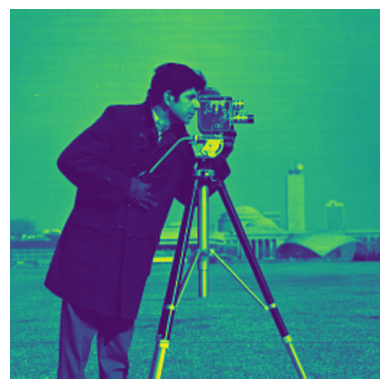

In [ ]:
#Adding second image
imageTwo = "/content/drive/MyDrive/AI&ML/WEEK1/cameraman.png"

# Check if the file exists
if os.path.exists(imageTwo):
    # Open and display the image
    image_two = Image.open(imageTwo)
    plt.imshow(image_two)
    plt.axis("off")
    plt.show()
else:
    print("Image not found. Check the file path!")

#EXERCISE01 : GETTING STARTED WITH IMAGE PROCESSING WITH PYTHON

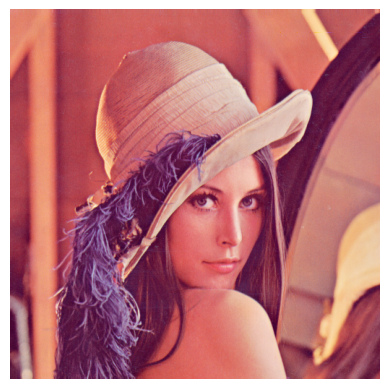

In [51]:
#1 Read and display the image

Image1 = Image.open(imageOne)
Image1.show()
plt.imshow(Image1)
plt.axis("off")
plt.show()

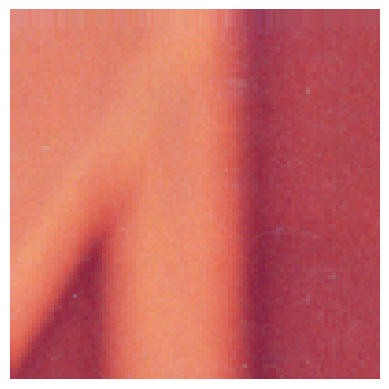

In [50]:
#Display only the top corner of 100x100 px

# Selecting the top corner of the image
Image1_corner = Image1.crop((0, 0, 100, 100))
plt.imshow(Image1_corner)
plt.axis("off")
plt.show()

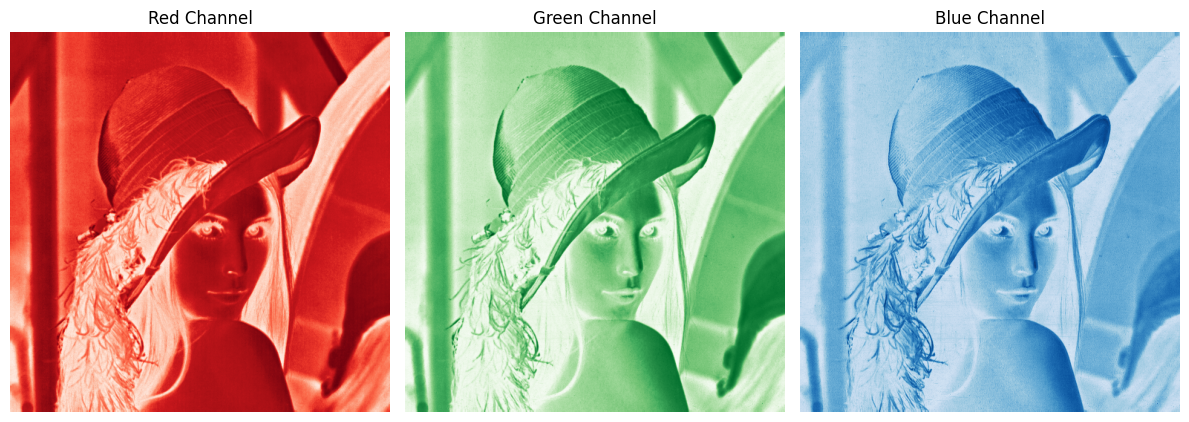

In [49]:
#Show the three color channels(R,G,B)

# Splitting image into Red, Green and Blue Channels
r , g , b = Image1.split()

# Converting each channel into a NumPy array
r_array = np.array(r)
g_array = np.array(g)
b_array = np.array(b)

fig, axes = plt.subplots(1, 3, figsize=(12,5))

# Red Channel
axes[0].imshow(r_array, cmap='Reds')
axes[0].set_title("Red Channel")
axes[0].axis("off")

# Green Channel
axes[1].imshow(g_array, cmap='Greens')
axes[1].set_title("Green Channel")
axes[1].axis("off")

# Blue Channel
axes[2].imshow(b_array, cmap='Blues')
axes[2].set_title("Blue Channel")
axes[2].axis("off")

plt.tight_layout()
plt.show()



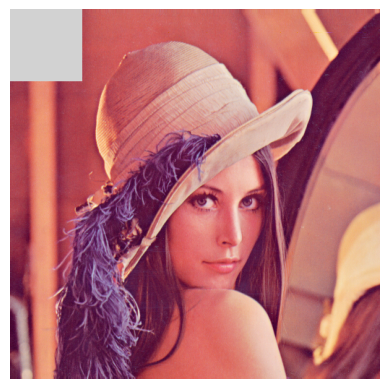

In [48]:
#4 Modify the top 100x100 pixes to a value of 210 and display the resulting image.

# Converting image into NumPy array
Image1_modified = np.array(Image1)

# Modifying the top 100x100 px to value of 210
Image1_modified[:100 , :100] = 210

# Converting back to the image
Image1_modified = Image.fromarray(Image1_modified)
plt.imshow(Image1_modified)
plt.axis("off")
plt.show()


#EXERCISE02 : MORE IMAGE PROCESSING TASKS

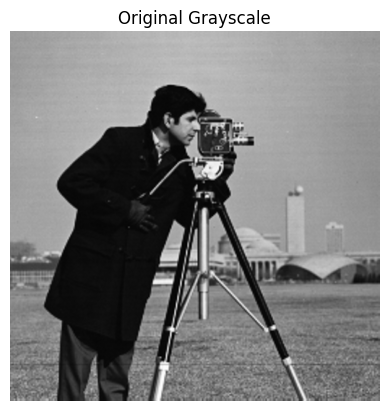

In [47]:
#1 Load and display a grayscale image

# Converting the image into grayscale image
gray_image = Image.open(imageTwo).convert("L")
plt.imshow(gray_image, cmap="gray")
plt.title("Original Grayscale")
plt.axis("off")
plt.show()

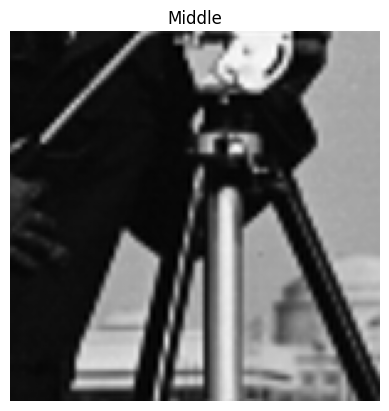

In [46]:
#2 Extract and display the middle section of image (150 px)

# Converting the grayscale image to a Numpy array
grayImg_array = np.array(gray_image)

# Height and Width of the Image
height, width = grayImg_array.shape

# Calculating center co-ordinates of the image
center_x, center_y = width // 2, height // 2

# Extracting a 150x150 px section
middle_section = grayImg_array[center_y - 75: center_y + 75 , center_x -75: center_x + 75]
plt.imshow(middle_section, cmap="gray")
plt.title("Middle")
plt.axis("off")
plt.show()


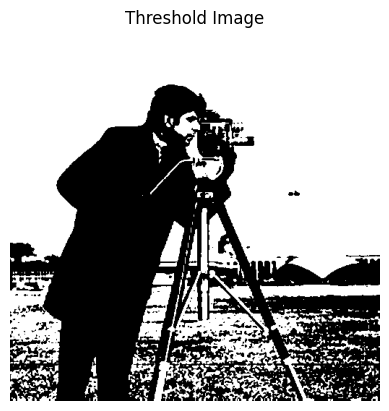

In [45]:
#3 Apply a simple threshold to image

# Lambda function to convert pixel to either black or white based on a threshold of 128
bin_img = gray_image.point(lambda x: 0 if x < 128 else 255, "1")
plt.imshow(bin_img, cmap="gray")
plt.title("Threshold Image")
plt.axis("off")
plt.show()

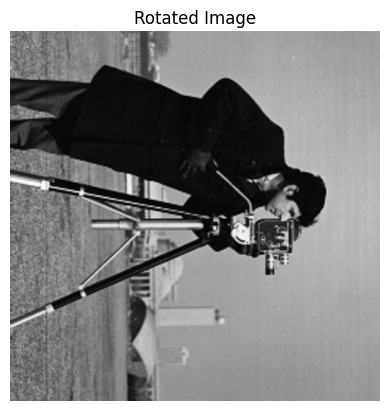

In [44]:
#4 Rotate 90 degrees clockwise

# Function to rotate the image clockwise
rotated_img = gray_image.rotate(-90)
plt.imshow(rotated_img, cmap="gray")
plt.title("Rotated Image")
plt.axis("off")
plt.show()

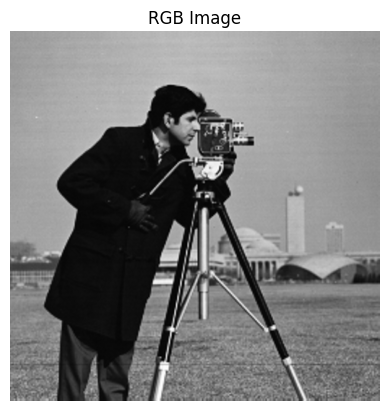

In [43]:
#5 Convert grayscale to an RGB image

# Converting image into RGB
rgb_img = gray_image.convert("RGB")
plt.imshow(rgb_img)
plt.title("RGB Image")
plt.axis("off")
plt.show()

#EXERCISE03 : IMAGE COMPRESSION AND DECOMPRESSION USING PCA

In [41]:
#1 Load and prepare data for PCA compression
def pca_compression(Image1, k):

  # Converting image into grayscale
  img_array = np.array(Image1.convert("L"))
  mean = np.mean(img_array, axis=0)

  centered = img_array - mean

  # Computing the covariance matrix of the centered data
  cov_matrix = np.cov(centered, rowvar=False)

  # Computing eigenvalues and eigenvectors of the covariance matrix
  eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

  # Sorting eigenvalues and corresponding eigenvectors in descending order
  sorted_indices = np.argsort(eigenvalues)[::-1]
  eigenvectors = eigenvectors[:, sorted_indices[:k]]

  # Projecting the centered data onto the selected principal components (compression)
  compressed_data = np.dot(centered, eigenvectors)

  # Reconstructing the image by reversing the PCA transformation (decompression)
  decompressed_data = np.dot(compressed_data, eigenvectors.T) + mean

  return decompressed_data


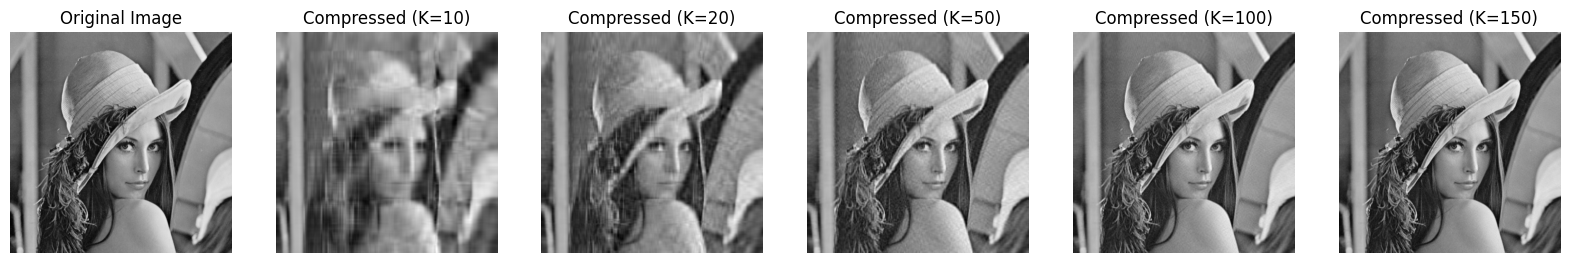

In [42]:
#2 Apply PCA Compression with different K values

# Defining different values of K
k_values = [10, 20, 50, 100, 150]

fig, axes = plt.subplots(1, 6, figsize=(20, 12))

# Original Image
axes[0].imshow(Image1.convert("L"), cmap = "gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

# Using for loop through differnt K values
for i, k in enumerate(k_values):

  # PCA compression with K principal
  compressed_img = pca_compression(Image1, k)
  axes[i+1].imshow(compressed_img, cmap="gray")
  axes[i+1].set_title(f"Compressed (K={k})")
  axes[i+1].axis("off")

plt.show()